In [1]:
# Import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Set visualization style for a professional look
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [5]:
# Load the dataset
housing = fetch_california_housing()
# Create a pandas DataFrame for easier manipulation
# The data is in housing.data, feature names in housing.feature_names
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# The target variable (median house value) is in housing.target
df['MedHouseVal'] = housing.target

print("Dataset successfully loaded.")
print("Shape of the DataFrame:", df.shape)

Dataset successfully loaded.
Shape of the DataFrame: (20640, 9)


In [7]:
# Display the first 5 rows to get a feel for the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [9]:
# Get a concise summary of the dataframe
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# Get descriptive statistics for each column
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min    

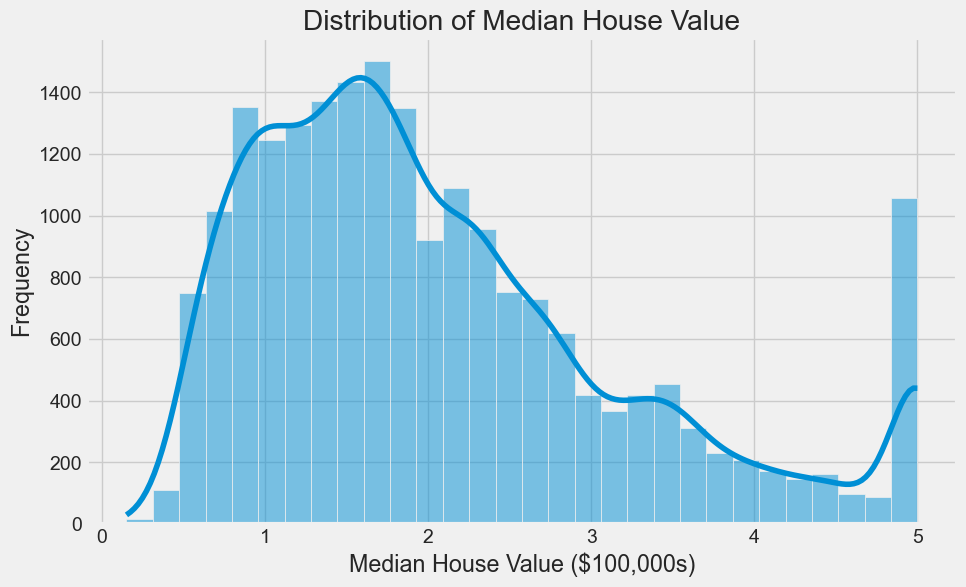

In [13]:
# Distribution of the Target Variable (Median House Value)
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()

The target variable, MedHouseVal, is skewed to the left with a tail of very expensive houses. There's also a distinct peak at the high end, which might indicate a cap on the values recorded.

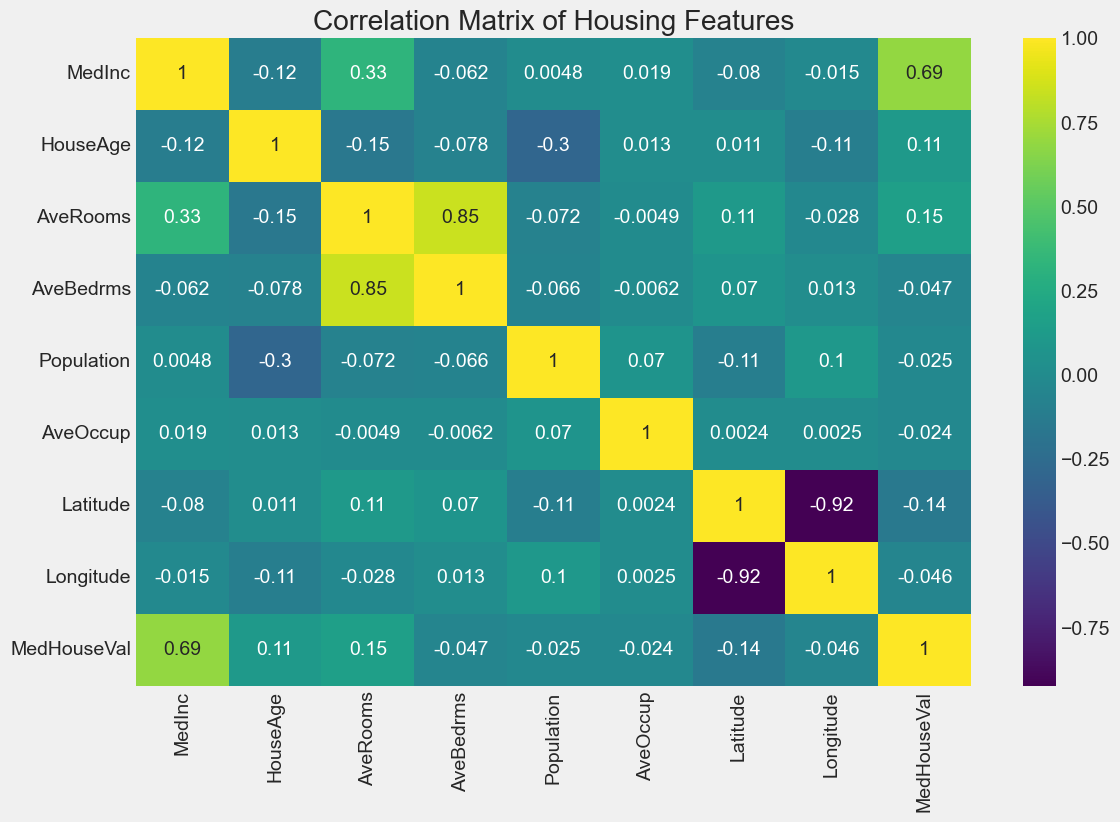

In [15]:
# Correlation Heatmap to see correlations between variables
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Housing Features')
plt.show()

The heatmap shows that MedInc (Median Income) has the strongest positive correlation with our target, MedHouseVal. This makes intuitive sense—areas with higher income levels tend to have more expensive houses.

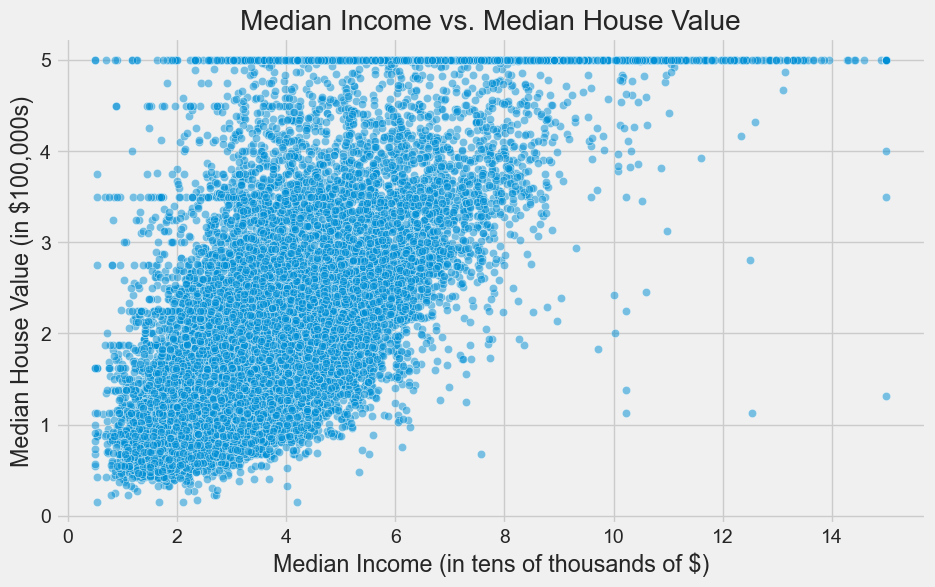

In [19]:
# 3. Scatter plot to explore the strongest relationship
# Let's look closer at Median Income vs. Median House Value.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income (in tens of thousands of $)')
plt.ylabel('Median House Value (in $100,000s)')
plt.show()

This plot confirms the strong positive linear relationship. As median income increases, the median house value also tends to increase. The cap at $500,000 is also very clear here.

In [21]:
# Define Features (X) and Target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split data into training and testing sets
# use 80% for training and 20% for testing.
# random_state ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (16512, 8)
Testing set shape: (4128, 8)


In [23]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Only transform the test set

In [25]:
# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [27]:
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

In [29]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
R-squared (R²): 0.58


An $R^2$ score of approximately 0.58-0.60 is a typical result for this dataset with a basic Linear Regression model. This means our model can explain about 60% of the variation in house prices, which is a reasonable start. The scatter plot shows that while many predictions are close to the actual values (the red line), there is still a fair amount of variance the model isn't capturing.

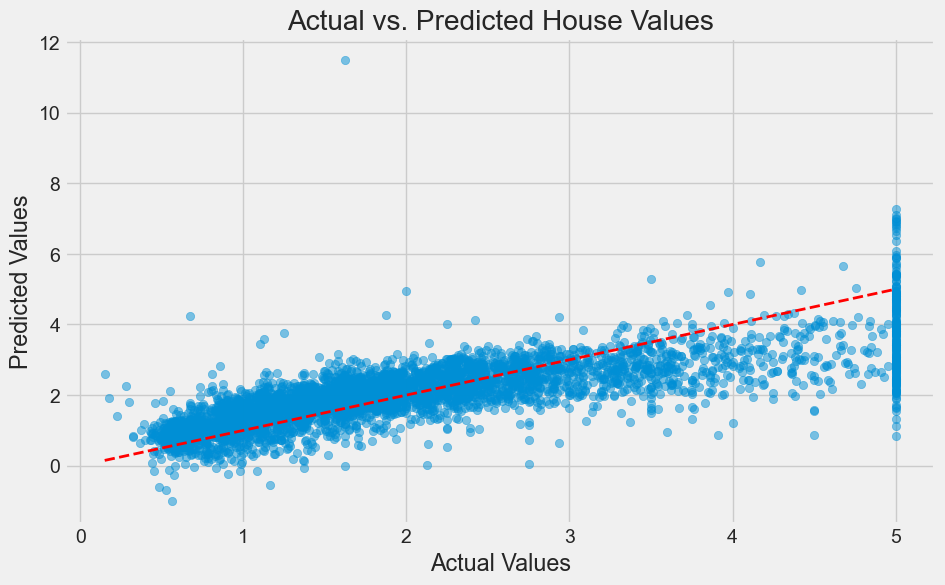

In [31]:
# A good practice is to visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted House Values")
plt.show()

In [33]:
# Create a DataFrame to view the coefficients
coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeffs.sort_values(by='Coefficient', ascending=False))

            Coefficient
MedInc         0.854383
AveBedrms      0.339259
HouseAge       0.122546
Population    -0.002308
AveOccup      -0.040829
AveRooms      -0.294410
Longitude     -0.869842
Latitude      -0.896929


Most Important Feature: The model's coefficients confirm our EDA findings. Median Income (MedInc) has the largest positive coefficient, indicating it is the most significant driver of house prices in this model.

Model Performance: Our model provides a solid baseline. With an R2 of ~0.59, it has some predictive power but leaves room for improvement.
